# Image Enhancement

In this notebook we shall explore few ways of image contrast enhancement using Skimage. We shall look at:
1. Histogram matching - the offset image is adjusted such that it's cumulative histogram matches that of its reference.
2. Adaptive Histogram Equalization - It is a local enahncement algorithm unlike global histogram equalization. It computes the histogram for different regions of the image to adjust them seperately.
3. Gamma Correction - This function transforms the input image pixelwise according to the equation O = I ** gamma after scaling each pixel to the range 0 to 1.

The images have been taken from sample images of https://cellprofiler.org/ 

In [1]:
from google.colab import files

uploaded = files.upload()#creating file input stream

for fn in uploaded.keys():#getting the input bytes
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))#get name and length of file

Saving AS_09047_050428030001_O05f00d2.TIF to AS_09047_050428030001_O05f00d2.TIF
Saving AS_09047_050428030001_O05f01d2.TIF to AS_09047_050428030001_O05f01d2.TIF
User uploaded file "AS_09047_050428030001_O05f00d2.TIF" with length 264158 bytes
User uploaded file "AS_09047_050428030001_O05f01d2.TIF" with length 264158 bytes


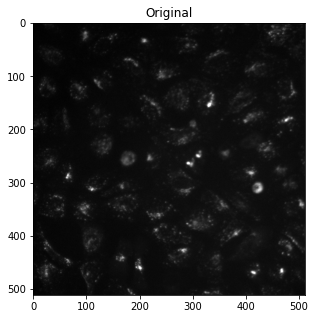

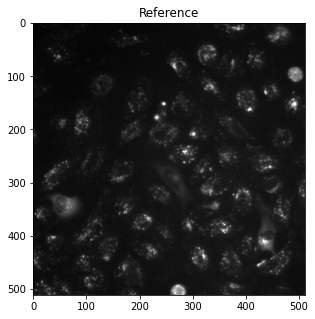

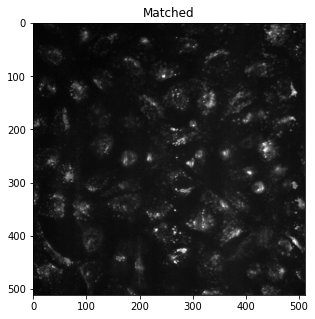

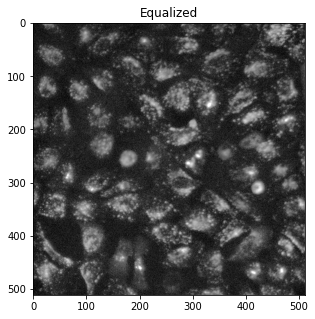

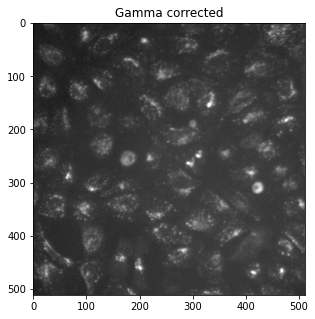

In [4]:
import matplotlib.pyplot as plt

from skimage import data,io
from skimage import exposure
from skimage import exposure


reference = io.imread("AS_09047_050428030001_O05f00d2.TIF")#reference fot matching histogram
offset = io.imread("AS_09047_050428030001_O05f01d2.TIF")

matched_offset= exposure.match_histograms(offset, reference, multichannel=True)#histogram matching
adp_hist=exposure.equalize_adapthist(offset, clip_limit=0.03)#adaptive histogram, higher clip limit gives higher contrast
gamma =  exposure.adjust_gamma(offset, 0.5)#gamma adjust, lower value gives higher contrast

plt.title('Original')
plt.rcParams["figure.figsize"] = [5,5]
plt.imshow(offset,cmap='gray')
plt.show()
plt.title('Reference')
plt.rcParams["figure.figsize"] = [5,5]
plt.imshow(reference,cmap='gray')
plt.show()
plt.title('Matched')
plt.rcParams["figure.figsize"] = [5,5]
plt.imshow(matched_offset,cmap='gray')
plt.show()
plt.title('Equalized')
plt.rcParams["figure.figsize"] = [5,5]
plt.imshow(adp_hist,cmap='gray')
plt.show()
plt.title('Gamma corrected')
plt.rcParams["figure.figsize"] = [5,5]
plt.imshow(gamma,cmap='gray')
plt.show()



